## Setup inicial

In [571]:
import sys
!{sys.executable} -m pip install numpy pandas matplotlib sklearn xgboost --user pandas

# Visualização de dados

## Importação dos dados

Baixe o CSV do dataset [AQUI](https://data.brasil.io/dataset/covid19/caso_full.csv.gz). 

Para a leitura dos dados, usaremos a função [`read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) do Pandas, passando como argumento o caminho relativo para o CSV que baixamos.

Com o método [`head`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) podemos ver as primeiras linhas de nosso dataset.

In [572]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("caso_full.csv")
df.head(10)

,city,city_ibge_code,date,epidemiological_week,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
0,São Paulo,3550308.0,2020-02-25,9,12252023.0,False,False,1,0.00816,2020-02-25,0.0,0,1,city,SP,1,0
1,NaN,35.0,2020-02-25,9,45919049.0,False,False,1,0.00218,2020-02-25,0.0,0,1,state,SP,1,0
2,São Paulo,3550308.0,2020-02-26,9,12252023.0,False,False,1,0.00816,2020-02-26,0.0,0,2,city,SP,0,0
3,NaN,35.0,2020-02-26,9,45919049.0,False,False,1,0.00218,2020-02-26,0.0,0,2,state,SP,0,0
4,São Paulo,3550308.0,2020-02-27,9,12252023.0,False,False,1,0.00816,2020-02-27,0.0,0,3,city,SP,0,0
5,NaN,35.0,2020-02-27,9,45919049.0,False,False,1,0.00218,2020-02-27,0.0,0,3,state,SP,0,0
6,São Paulo,3550308.0,2020-02-28,9,12252023.0,False,False,2,0.01632,2020-02-28,0.0,0,4,city,SP,1,0
7,NaN,35.0,2020-02-28,9,45919049.0,False,False,2,0.00436,2020-02-28,0.0,0,4,state,SP,1,0
8,São Paulo,3550308.0,2020-02-29,9,12252023.0,False,False,2,0.01632,2020-02-29,0.0,0,5,city,SP,0,0
9,NaN,35.0,2020-02-29,9,45919049.0,False,False,2,0.00436,2020-02-29,0.0,0,5,state,SP,0,0


* **city:** nome do município (pode estar em branco quando o registro é referente ao estado, pode ser preenchido com Importados/Indefinidos também).
* **city_ibge_code:** código IBGE do local.
* **date:** data de coleta dos dados no formato YYYY-MM-DD.
* **epidemiological_week:** número da semana epidemiológica.
* **estimated_population_2019:** população estimada para esse município/estado em 2019, segundo o IBGE (acesse o script que faz o download e conversão dos dados de população).
* **is_last:** campo pré-computado que diz se esse registro é o mais novo para esse local, pode ser True ou False (caso filtre por esse campo, use is_last=True ou is_last=False, não use o valor em minúsculas).
* **is_repeated:** campo pré-computado que diz se as informações nesse registro foram publicadas pela Secretaria Estadual de Saúde no dia date ou se o dado é repetido do último dia em que o dado está disponível (igual ou anterior a date). Isso ocorre pois nem todas as secretarias publicam boletins todos os dias. Veja também o campo last_available_date.
* **last_available_confirmed:** número de casos confirmados do último dia disponível igual ou anterior à data date.
* **last_available_confirmed_per_100k_inhabitants:** número de casos confirmados por 100.000 habitantes do último dia disponível igual ou anterior à data date.
* **last_available_date:** data da qual o dado se refere.
* **last_available_death_rate:** taxa de mortalidade (mortes / confirmados) do último dia disponível igual ou anterior à data date.
* **last_available_deaths:** número de mortes do último dia disponível igual ou anterior à data date.
* **order_for_place:** número que identifica a ordem do registro para este local. O registro referente ao primeiro boletim em que esse local aparecer será contabilizado como 1 e os demais boletins incrementarão esse valor.
* **place_type:** tipo de local que esse registro descreve, pode ser city ou state.
* **state:** sigla da unidade federativa, exemplo: SP.
* **new_confirmed:** número de novos casos confirmados desde o último dia (note que caso is_repeated seja True, esse valor sempre será 0 e que esse valor pode ser negativo caso a SES remaneje os casos desse município para outro).
* **new_deaths:** número de novos óbitos desde o último dia (note que caso is_repeated seja True, esse valor sempre será 0 e que esse valor pode ser negativo caso a SES remaneje os casos desse município para outro).

## Limpeza do dataset

Sem dúvida o passo mais importante para a visualização de dados é a manipulação do dataset até que fique da forma que desejamos.

1. **Remover:** algumas colunas não serão utilizadas nesse workshop, então podemos removê-las usando o método [`drop`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) e passando uma lista contendo o nome das colunas que queremos remover.
2. **Renomear:** para facilitar nosso trabalho, podemos renomear as colunas do dataset passando um mapa de tradução como argumento pro método [`rename`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)
3. **Reordenar:** para facilitar a visualização do resultado, reordenamos as colunas usando o operador `[]` para **selecionar** colunas. Selecionando-as na ordem desejada, podemos atribuí-las ao nosso dataset alterando-o para a ordem desejada.
4. **Filtrar:** ainda usando o operador `[]` podemos filtrar nosso dataset baseado em uma condição. Nesse caso, vamos criar dois datasets: um contendo apenas as linhas em que `place_type` é `state` e outro para `city`. É possível compor condições usando os operadores `and` e `or`.

In [573]:
# Dropping unused columns
df = df.drop(['is_last', 'is_repeated', 'last_available_confirmed_per_100k_inhabitants', 'last_available_date', 'last_available_death_rate', 'order_for_place'], axis=1)

# Renaming columns
df = df.rename(columns={'epidemiological_week': 'week', 'estimated_population_2019': 'population', 'last_available_confirmed': 'confirmed', 'last_available_deaths': 'deaths'})

# Reordering columns
df = df[['date', 'week', 'place_type', 'state', 'city', 'city_ibge_code', 'population', 'new_confirmed', 'new_deaths', 'confirmed', 'deaths']]

# Preparing datasets
state_df = df[df['place_type'] == 'state']
city_df = df[df['place_type'] == 'city']

state_df.head()

,date,week,place_type,state,city,city_ibge_code,population,new_confirmed,new_deaths,confirmed,deaths
1,2020-02-25,9,state,SP,NaN,35.0,45919049.0,1,0,1,0
3,2020-02-26,9,state,SP,NaN,35.0,45919049.0,0,0,1,0
5,2020-02-27,9,state,SP,NaN,35.0,45919049.0,0,0,1,0
7,2020-02-28,9,state,SP,NaN,35.0,45919049.0,1,0,2,0
9,2020-02-29,9,state,SP,NaN,35.0,45919049.0,0,0,2,0


## Estrutura do dataset

Nem sempre o dataset que estamos trabalhando é uniforme, então é importante entendermos sua estrutura para melhor manipulá-lo. Um bom método para isso é o [`describe`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html).

No entanto, o `describe` por si só pode fornecer dados demais ou dados indesejados. Nesse caso, vamos agrupar nosso dataset por estado usando o método [`groupby`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html), o que retorna estatísticas de cada uma das colunas pra cada estado. Pra facilitar a visualização, vamos escolher apenas a coluna `new_confirmed`.

In [574]:
# state_df.describe()

# state_df.groupby('state').describe()

# state_df.groupby('state')['new_confirmed'].describe()

state_df.groupby('state')['new_confirmed'].describe().sort_values(by='max', ascending=False)

,count,mean,std,min,25%,50%,75%,max
state,,,,,,,,
RJ,80.0,419.862500,659.692175,0.0,51.00,197.5,565.50,4427.0
SP,89.0,905.146067,1140.736968,0.0,45.00,476.0,1162.00,4092.0
PA,67.0,360.074627,602.480864,0.0,7.00,74.0,412.00,3462.0
CE,69.0,455.260870,622.975985,0.0,44.00,197.0,586.00,2661.0
PE,73.0,366.931507,453.062552,0.0,10.00,200.0,541.00,2279.0
BA,79.0,140.316456,253.597427,0.0,13.50,53.0,179.50,1812.0
AM,72.0,352.319444,465.120303,0.0,21.75,112.5,498.00,1663.0
MA,65.0,288.723077,358.903430,0.0,21.00,152.0,386.00,1555.0
RS,75.0,84.480000,171.643672,0.0,12.50,35.0,70.00,1175.0


## Traçando gráficos

Para facilitar a visualização desses dados, vamos começar a traçar alguns gráficos. 

Para começar, vamos ver como anda a evolução do número de confirmados no Brasil. Em seguida, vamos comparar com o número de mortes.

Para isso, vamos agrupar todos os dados do Brasil por data, selecionar a coluna de confirmados e somar (dia a dia). Em seguida, invocamos o método [`plot`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) pra traçar o gráfico. O método pode receber uma série de argumentos, vamos testar alguns:

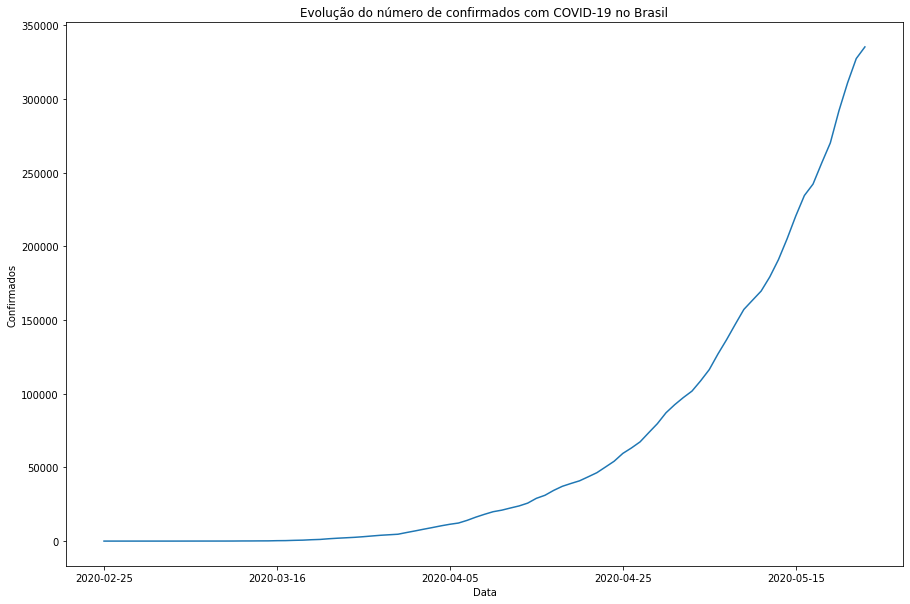

In [575]:
# state_df.groupby('date')['confirmed'].sum().plot()

# # figsize
# state_df.groupby('date')['confirmed'].sum().plot(figsize=(15,10))

# # y-axis
# state_df.groupby('date').sum().plot(figsize=(15,10), y='confirmed')

# # chart type
# state_df.groupby('date')['confirmed'].sum().plot(figsize=(15,10), kind='bar')

# title and labels
state_df.groupby('date')['confirmed'].sum().plot(figsize=(15,10), title='Evolução do número de confirmados com COVID-19 no Brasil')
plt.xlabel("Data")
plt.ylabel("Confirmados")
plt.show()

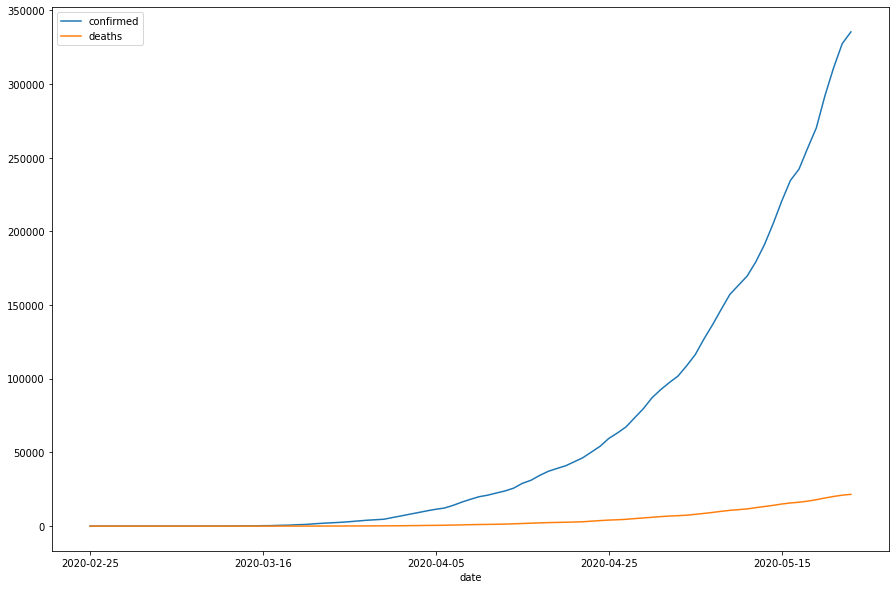

In [576]:
state_df.groupby('date')[['confirmed', 'deaths']].sum().plot(figsize=(15,10))

## Médias móveis

Um método de manipulação muito usado na visualização de dados é a média móvel, que consegue em calcular a média dos valores em uma janela de X anos, reduzindo o ruído dos gráficos e facilitando a visualização de tendências, por exemplo.

Para traçar o gráfico do número de confirmados por estado, precisamos usar o método [`pivot`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html) para reestruturar nosso dataset. Após isso, teremos um dataset com as datas como linhas, os estados como colunas e o número de confirmados naquele dia para aquele determinado estado como valor da célula.

Além de reorganizar nosso dataset, isso também garante que tenhamos o mesmo número de dias para cada um dos estados.

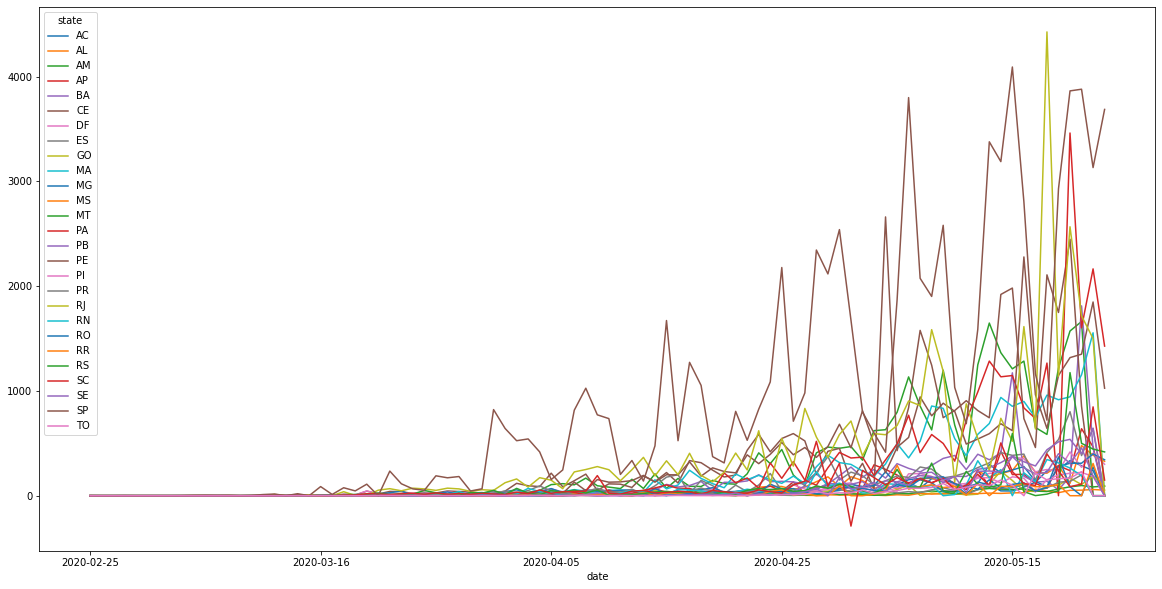

In [577]:
# state_df.pivot(values='new_confirmed', index='date', columns='state').fillna(0)

x = state_df.pivot(values='new_confirmed', index='date', columns='state').fillna(0)
x.plot(figsize=(20,10))

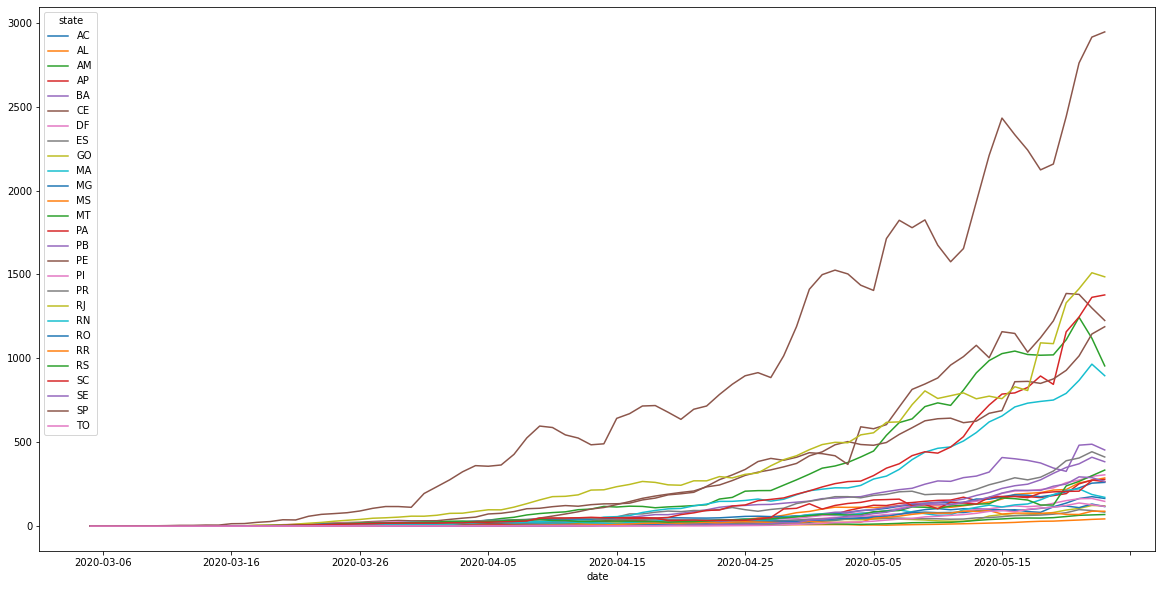

In [578]:
ma = state_df.pivot(values='new_confirmed', index='date', columns='state').fillna(0)
ma = ma.rolling(10).mean()
ma.plot(figsize=(20,10))

## BONUS: Evolução no mundo

Vamos analisar como anda a evolução do número de casos de COVID por dia pelo mundo e comparar com o Brasil. 
Você pode baixar o dataset [AQUI](https://covid.ourworldindata.org/data/ecdc/new_cases.csv).

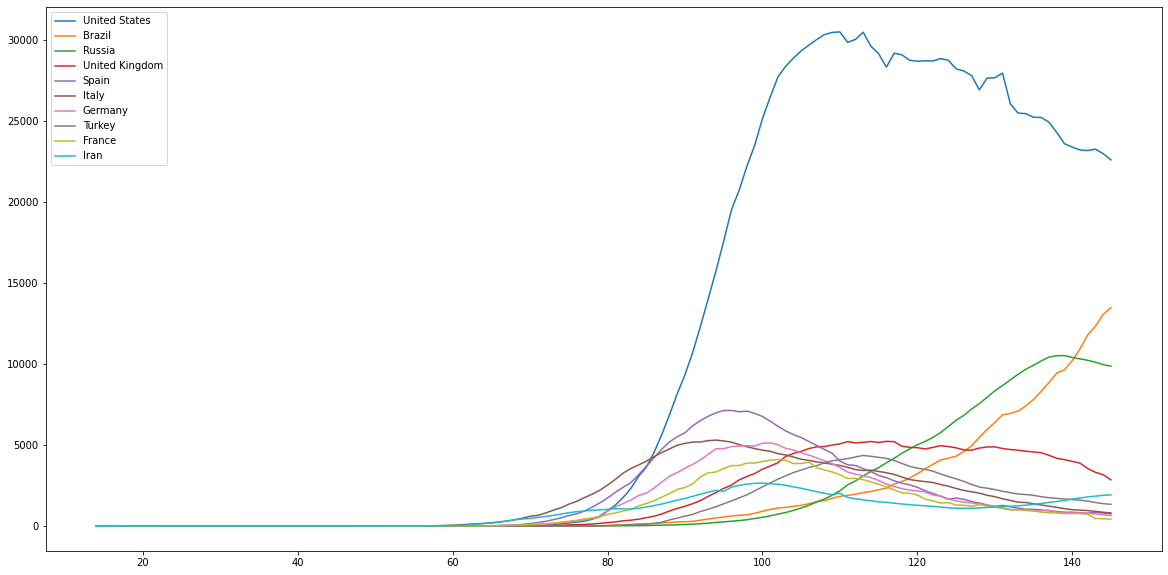

In [579]:

world_df = pd.read_csv("new_cases.csv")

# Getting the countries with most cases
countries = world_df.drop(['World'], axis=1).fillna(0).set_index('date').sum().sort_values(ascending=False).head(10).index.tolist()

world_df.fillna(0)[countries].rolling(15).mean().plot(figsize=(20,10))

-----

# Algoritmos de Machine Learning

Agora que já sabemos manipular um dataset e visualizá-lo da melhor forma possível, podemos avançar e implementar algoritmos de predição usando Machine Learning.

In [580]:
from sklearn.model_selection import train_test_split

brazil_df = world_df[['date', 'Brazil']]

features = np.array(range(len(brazil_df)))
label = brazil_df['Brazil'].to_list()

X_train, X_test, y_train, y_test = train_test_split(features, label)
X_train, X_test = X_train.reshape(-1, 1), X_test.reshape(-1, 1)

## Linear Regression

O algoritmo de predição mais simples: por meio de uma sequência de pontos, ele tenta traçar uma linha que acarrete no menor erro possível. Embora funcione muito bem para sistemas lineares de primeiro grau, tem problemas em prever resultados polinominais de ordens maiores.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/1200px-Linear_regression.svg.png" width="400"/>

Mais detalhes [AQUI](https://en.wikipedia.org/wiki/Linear_regression)

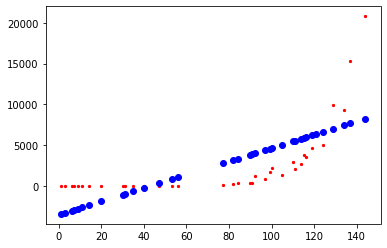

In [581]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Make predictions using the testing set
pred = linreg.predict(X_test)
plt.scatter(X_test, y_test,  color='red', s=5)
plt.scatter(X_test, pred, color='blue')
plt.show()

## Logistic Regression

Semelhante à regressão linear, mas por sua vez tenta traçar uma curva logística para tentar encontrar "o melhor lugar" de cada ponto. Muito utilizado para problemas de classificação e não para problemas de predição uma vez que possui um limite no valor que pode ser encontrado.

<img src="https://i0.wp.com/www.insightsbot.com/wp-content/uploads/2018/12/841495d7-0747-450a-a26b-4ae0e3eef6af.jpg?fit=432%2C288" width="400"/>

Mais detalhes [AQUI](https://en.wikipedia.org/wiki/Logistic_regression)

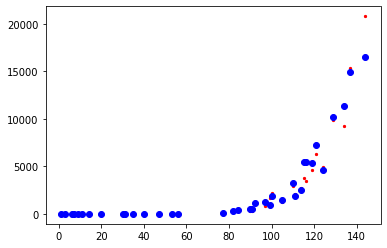

In [582]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=5000)
logreg.fit(X_train, y_train)

# Make predictions using the testing set
pred = logreg.predict(X_test)

plt.scatter(X_test, y_test,  color='red', s=5)
plt.scatter(X_test, pred, color='blue')
plt.show()

In [583]:
print(logreg.predict(np.array([90, 145, 170, 200, 300]).reshape(-1,1)))

[  487 16508 16508 16508 16508]


## SVM (Support Vector Machine)

Embora seja utilizado na maioria das vezes para classificação, SVMs também possuem casos de uso para regressão. Dado um conjunto de pontos, o algoritmo tenta criar uma série de vetores que "guiarão" a curva final. É possível definir o grau do polinômio que se deseja traçar, permitindo maior ou menor otimização

<img src="https://lh5.googleusercontent.com/xORUlTpVI2lLZ9VaRC9iyhVj0naiwROy9zDhaiNAwWzHPbpVLynDoTwLHAvKtkmCto3VVSrpvB1vuxkSgX92_qUO1_kpESSw36OTCfSx2KgYzuRKTSpD8muTXIFNw-Hr0gHw4zN2" width="600"/>

Mais detalhes [AQUI](https://www.aionlinecourse.com/tutorial/machine-learning/support-vector-regression)

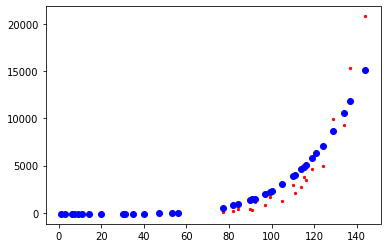

In [584]:
from sklearn.svm import SVR

svr = SVR(kernel='poly', degree=5)
svr.fit(X_train, y_train)

# Make predictions using the testing set
pred = svr.predict(X_test)

plt.scatter(X_test, y_test,  color='red', s=5)
plt.scatter(X_test, pred, color='blue')
plt.show()

In [585]:
print(svr.predict(np.array([90, 145, 170, 200, 300]).reshape(-1,1)))

[  1332.07572647  15683.81175186  34893.06232108  78795.91662491
 599175.58601708]


## Redes Neurais

_Multi-layer Perceptron_ são uma classe de redes neurais que consistem em uma camada de entrada de dados, uma camada de saída que prevê os resultados e, entre elas, as chamadas _hidden layers_ que efetuam todo o processamento computacional de maneira oculta.

<img src="https://www.researchgate.net/profile/Allan_Kardec_Barros_Filho/publication/274240858/figure/fig1/AS:392021136166914@1470476530215/TOPOLOGY-OF-A-MULTILAYER-PERCEPTRON-NEURAL-NETWORK.png" width="600"/>

Mais detalhes [AQUI](https://pathmind.com/wiki/multilayer-perceptron)

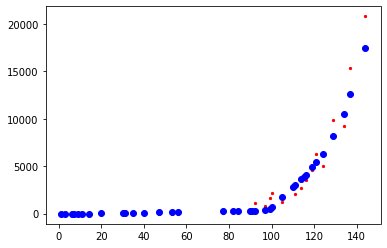

In [586]:
from sklearn.neural_network import MLPRegressor

mlpreg = MLPRegressor(max_iter=1000, solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(50, 10))
mlpreg.fit(X_train, y_train)

# Make predictions using the testing set
pred = mlpreg.predict(X_test)

plt.scatter(X_test, y_test,  color='red', s=5)
plt.scatter(X_test, pred, color='blue')
plt.show()

In [587]:
print(mlpreg.predict(np.array([90, 145, 170, 200, 300]).reshape(-1,1)))

[   317.34480195  18205.05121418  35640.95673486  56564.04335967
 126307.6654424 ]


------

# DESAFIO: Prevendo o futuro

Agora que já sabemos quais algoritmos são válidos para cada situação, vamos treinar um modelo que preveja a evolução da COVID-19 no Brasil dada a trajetória nos outros países.

In [588]:
from datetime import datetime

x = world_df.set_index('date').stack().reset_index()
x = x.rename(columns={'level_1': 'country', 0: 'cases'})
x['date'] = (pd.to_datetime(x['date']) - pd.to_datetime('2019-12-31'))/np.timedelta64(1,'D')

def appendDaysSinceFirstCase(df):
    first_day =  df.sort_values(by='cases').loc[x['cases'] >= 1]['date'].values[0]
    df['days_since_first_case'] = df['date'] - first_day
    df['cases'] = df['cases'].rolling(15).mean()
    return df
    
df = x.groupby('country').apply(appendDaysSinceFirstCase)
df = df[df['days_since_first_case'] >= 0].drop('date', axis=1)
df = df.dropna()

world_df = df.groupby('country').filter(lambda x : max(x['cases'].values) > 100 and x['cases'].values[-1] < 0.7 * max(x['cases'].values))
brazil_df = df[df['country'] == 'Brazil']
world_df['country'] = world_df['country'].astype('category').cat.codes
brazil_df['country'] = brazil_df['country'].astype('category').cat.codes

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
